In [1]:
import numpy as np

data = np.load('data/data.npy')
target = np.load('data/target.npy')
data.shape[1:]

(50, 50, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(256, (3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       2560      
                                                                 
 activation (Activation)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 activation_1 (Activation)   (None, 22, 22, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                    

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [9]:
history = model.fit(train_data, train_target, validation_data=(test_data, test_target), epochs=47)

Epoch 1/47
48/48 [==============================] - 192s 4s/step - loss: 0.5665 - accuracy: 0.8412 - val_loss: 0.3531 - val_accuracy: 0.8538
Epoch 2/47
48/48 [==============================] - 100s 2s/step - loss: 0.3459 - accuracy: 0.8680 - val_loss: 0.2801 - val_accuracy: 0.8947
Epoch 3/47
48/48 [==============================] - 138s 3s/step - loss: 0.3048 - accuracy: 0.9105 - val_loss: 0.2472 - val_accuracy: 0.9298
Epoch 4/47
48/48 [==============================] - 101s 2s/step - loss: 0.2878 - accuracy: 0.9033 - val_loss: 0.2437 - val_accuracy: 0.9181
Epoch 5/47
48/48 [==============================] - 101s 2s/step - loss: 0.2535 - accuracy: 0.9248 - val_loss: 0.2228 - val_accuracy: 0.9240
Epoch 6/47
48/48 [==============================] - 103s 2s/step - loss: 0.2501 - accuracy: 0.9170 - val_loss: 0.1864 - val_accuracy: 0.9415
Epoch 7/47
48/48 [==============================] - 100s 2s/step - loss: 0.2247 - accuracy: 0.9307 - val_loss: 0.1721 - val_accuracy: 0.9532
Epoch 8/47
48

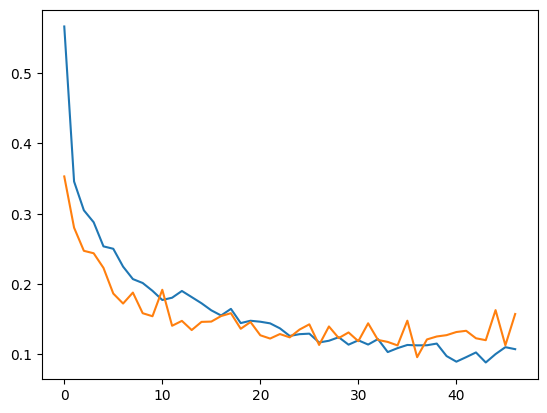

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

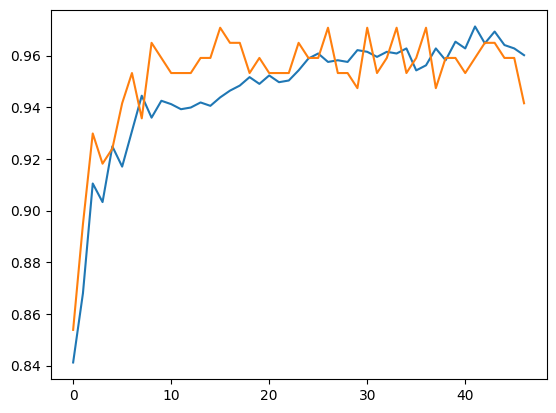

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [12]:
acc = model.evaluate(test_data, test_target)
print(acc)

6/6 [==============================] - 6s 429ms/step - loss: 0.1573 - accuracy: 0.9415
[0.1572623997926712, 0.9415204524993896]


In [13]:
model.save_weights(f'./trained_model.h5')